In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
data=pd.read_csv(r'C:\Users\Dev Sharma\Desktop\FRAUD DETECTION\PS_20174392719_1491204439457_log.csv')

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df=data

In [6]:
df1=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud"]]

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
dtypes: float64(5), int64(1)
memory usage: 291.3 MB


In [8]:
df1.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [9]:
df1['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
X = df1.drop('isFraud',axis=1)
y = df1['isFraud']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [14]:
import xgboost as xgb
classifier =xgb.XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
y_predict = classifier.predict(X_test)

In [16]:
Results = pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
6322570,0,0
3621196,0,0
1226256,0,0
2803274,0,0
3201247,0,0
3681019,0,0
1351584,0,0
5422829,0,0
5870912,0,0
2400263,0,0


In [17]:
wap=classifier.predict(np.array([1651561,156165,165165,161651,165116]).reshape(1, -1))
print(wap)

[0]


In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))


0.9995133032199524


In [19]:
y_train_pred = classifier.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

0.9995900161523756


In [20]:
y_test_proba = classifier.predict_proba(X_test)

print(y_test_proba.shape)

(1908786, 2)


In [21]:
y_test_proba[0:5,:]

array([[9.9999994e-01, 3.0644994e-08],
       [9.9999833e-01, 1.6866676e-06],
       [9.9997300e-01, 2.7019089e-05],
       [9.9999994e-01, 5.7112128e-08],
       [9.9999976e-01, 2.4088340e-07]], dtype=float32)

In [22]:
array_in_scientific = y_test_proba[0:5,:]
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)
print(array_in_normal)

[['0.9999999403953552' '0.0000000306449941']
 ['0.9999983310699463' '0.0000016866675878']
 ['0.9999729990959167' '0.0000270190885203']
 ['0.9999999403953552' '0.0000000571121284']
 ['0.9999997615814209' '0.0000002408833950']]


In [23]:
T = y_test_proba[:,1]
array_in_one = T

S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)

['0.0000000306449941' '0.0000016866675878' '0.0000270190885203' ...
 '0.0000004787326588' '0.0000252793142863' '0.0000009460750334']


In [24]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

Results.head(5)

,Actual,Predictions,Prob(Class = 1)
6322570,0,0,0.0000000306449941
3621196,0,0,0.0000016866675878
1226256,0,0,0.0000270190885203
2803274,0,0,0.0000000571121284
3201247,0,0,0.0000002408833950


In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1906170     148]
 [    781    1687]]


Text(95.72222222222221, 0.5, 'True Label')

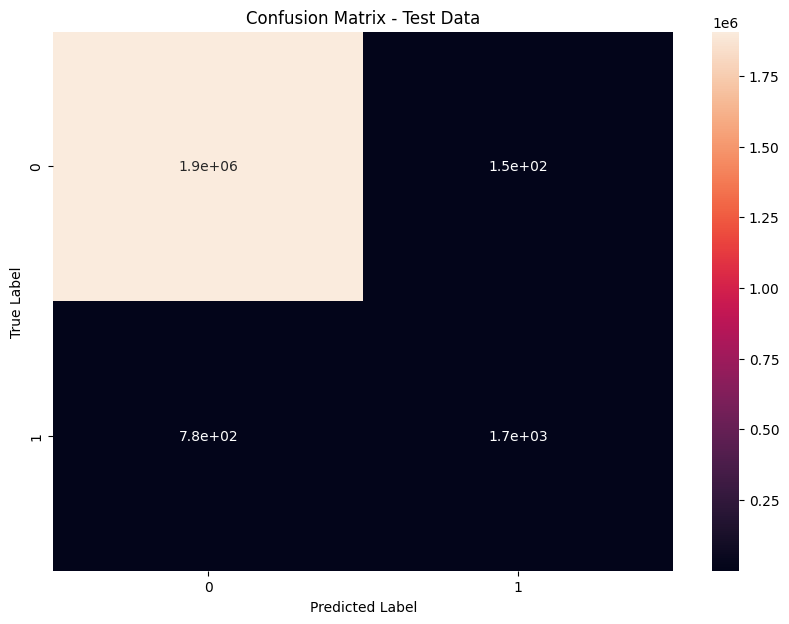

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [27]:
import pickle

In [28]:
pickle.dump(classifier,open('bank.pkl','wb'))

In [29]:
from joblib import dump
dump(classifier,'dev.joblib')

['dev.joblib']